In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
test = pd.read_csv("data/test_x.csv")

## 데이터 탐색

In [4]:
train.shape, test.shape

((45532, 78), (11383, 77))

In [229]:
train.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [230]:
test.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,1,1,0,1,1,0,1,1,1,1


In [231]:
set(train.columns) - set(test.columns)

{'voted'}

In [232]:
train["voted"]

0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [233]:
train.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [234]:
test.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

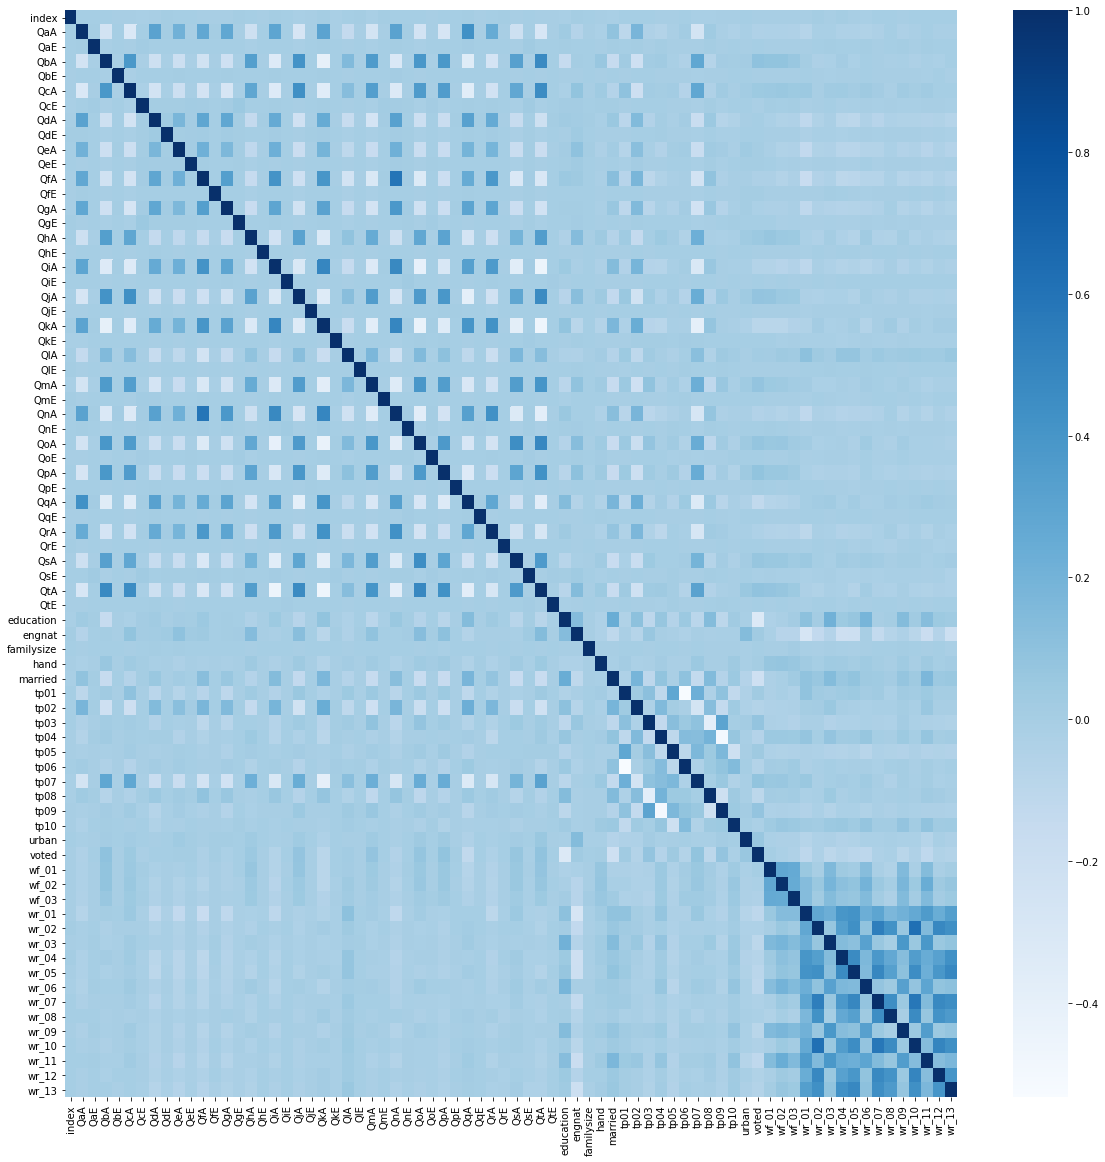

In [235]:
plt.figure(figsize = (20,20))
sns.heatmap(data = train.corr(), cmap ="Blues")

In [236]:
train["voted"] = train["voted"].map(lambda x:x-1)

## 학습 데이터 셋 분류

In [237]:
label_name = "voted"

In [238]:
train.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [239]:
X_train = train[['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']]

In [240]:
y_train = train[label_name]

In [241]:
X_test = test[['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']]

In [242]:
X_train.shape, y_train.shape, X_test.shape

((45532, 76), (45532,), (11383, 76))

In [243]:
# 데이터 타입 object 칼럼
X_train[["age_group", "gender","race","religion"]]

,age_group,gender,race,religion
0,30s,Female,White,Other
1,20s,Female,Asian,Hindu
2,30s,Male,White,Other
3,20s,Female,Asian,Hindu
4,20s,Male,White,Agnostic
...,...,...,...,...
45527,10s,Female,White,Jewish
45528,30s,Male,White,Atheist
45529,10s,Female,White,Christian_Other
45530,40s,Male,White,Atheist


## 데이터 전처리

In [244]:
X_train["age_group"] = X_train["age_group"].map(lambda x:int(x[:-1]))

<ipython-input-244-2769a47585cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["age_group"] = X_train["age_group"].map(lambda x:int(x[:-1]))


In [245]:
X_test["age_group"] = X_test["age_group"].map(lambda x:int(x[:-1]))

<ipython-input-245-ff23e9969a07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age_group"] = X_test["age_group"].map(lambda x:int(x[:-1]))


In [246]:
X_train_ohe = pd.get_dummies(X_train)

In [247]:
X_test_ohe = pd.get_dummies(X_test)

## 딥러닝

In [248]:
# tensorflow 를 tf로 불러오기
import tensorflow as tf

In [249]:
input_shape = X_train_ohe.shape[1]
input_shape

94

In [250]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [251]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 128, input_shape=[input_shape]),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,  activation = "sigmoid"),
    tf.keras.layers.Dense(1)])
model

In [252]:
dir(tf.keras.losses)

['BinaryCrossentropy',
 'BinaryFocalCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'binary_crossentropy',
 'binary_focal_crossentropy',
 'categorical_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'serialize',
 'sparse_categorical_crossen

In [253]:
dir(tf.keras.metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '

In [254]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['binary_crossentropy','accuracy'])

In [255]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               12160     
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 64)               

In [256]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [257]:
history = model.fit(X_train_ohe, y_train, epochs = 100, validation_split=0.2, callbacks = [early_stop, PrintDot()])

Epoch 1/100
1139/1139 [==============================] - 6s 4ms/step - loss: 1.1145 - binary_crossentropy: 1.1145 - accuracy: 0.5061 - val_loss: 0.7384 - val_binary_crossentropy: 0.7384 - val_accuracy: 0.5449
Epoch 2/100
1139/1139 [==============================] - 4s 3ms/step - loss: 0.7074 - binary_crossentropy: 0.7074 - accuracy: 0.5259 - val_loss: 0.6911 - val_binary_crossentropy: 0.6911 - val_accuracy: 0.5453
Epoch 3/100
1139/1139 [==============================] - 4s 3ms/step - loss: 0.6957 - binary_crossentropy: 0.6957 - accuracy: 0.5359 - val_loss: 0.6905 - val_binary_crossentropy: 0.6905 - val_accuracy: 0.5453
Epoch 4/100
1139/1139 [==============================] - 5s 4ms/step - loss: 0.6918 - binary_crossentropy: 0.6918 - accuracy: 0.5400 - val_loss: 0.6900 - val_binary_crossentropy: 0.6900 - val_accuracy: 0.5453
Epoch 5/100
1139/1139 [==============================] - 4s 3ms/step - loss: 0.7026 - binary_crossentropy: 0.7026 - accuracy: 0.5291 - val_loss: 0.6922 - val_binary

In [258]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,binary_crossentropy,accuracy,val_loss,val_binary_crossentropy,val_accuracy
13,0.691755,0.691755,0.534605,0.695363,0.695363,0.454705
14,0.691067,0.691067,0.537515,0.689316,0.689316,0.545295
15,0.691118,0.691118,0.539574,0.689813,0.689813,0.545295
16,0.691427,0.691427,0.536115,0.689195,0.689195,0.545295
17,0.691367,0.691367,0.538916,0.690654,0.690654,0.545295


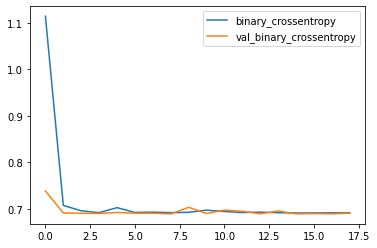

In [259]:
df_hist[["binary_crossentropy","val_binary_crossentropy"]].plot()

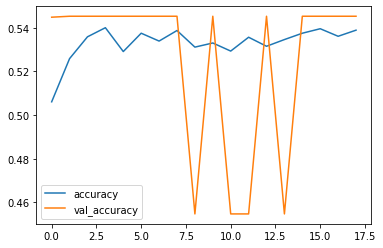

In [260]:
df_hist[["accuracy", "val_accuracy"]].plot()

## 모델 예측

In [261]:
y_pred = model.predict(X_test_ohe)
y_pred

356/356 [==============================] - 1s 1ms/step


array([[0.573476],
       [0.573476],
       [0.573476],
       ...,
       [0.573476],
       [0.573476],
       [0.573476]], dtype=float32)

In [262]:
y_predict = (y_pred.flatten() > 0.5).astype(int)
y_predict

array([1, 1, 1, ..., 1, 1, 1])

## 모델 제출

In [263]:
submission = pd.read_csv("/content/sample_submission.csv")
submission.head()

,index,voted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [264]:
submission["voted"] = y_predict

In [265]:
accuracy = float(df_hist["accuracy"][-1:])

In [266]:
file_name = f"{accuracy}_221204.csv"
file_name

'0.5389155745506287_221204.csv'

In [267]:
submission.to_csv(file_name, index = False)

In [268]:
pd.read_csv(file_name)

,index,voted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
11378,11378,1
11379,11379,1
11380,11380,1
11381,11381,1
